In [1]:
import math
import random
import numpy as np
import pandas as pd
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Extracción de los datos

## Conjunto de datos descomprimido

In [2]:
if os.path.exists('dataset-zip/denue_00_31-33_csv.zip'):
    with zipfile.ZipFile("dataset-zip/denue_00_31-33_csv.zip", 'r') as zip_ref:
        zip_ref.extractall("dataset-zip/")

## dataset convertido a encodign utf-8

In [3]:
with open("dataset-zip/conjunto_de_datos/denue_inegi_31-33_.csv", encoding="latin-1") as file:
            with open("dataset-zip/denue_inegi.csv", "w+", encoding="utf-8") as new_file:
                for line in file:
                    new_file.write(line)

# Pequeño análisis exploratorio

In [4]:
df = pd.read_csv('dataset-zip/denue_inegi.csv', low_memory=False)
df.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,32374,01001311812004094000000000U8,4 HERMANOS,NaN,311812,Panificación tradicional,31 a 50 personas,CALLE,LIMA,CALLE,...,Aguascalientes ...,2047,32,4499168611,AGELICADELHER@HOTMAIL.COM,NaN,Fijo,21.872900,-102.308631,2014-12
1,6710478,01001315223001071001000000U5,4M COMERCIALIZADORA,4M COMERCIALIZADORA SA DE CV,315223,Confección en serie de uniformes,31 a 50 personas,CALLE,TIZIANO,CALLE,...,Aguascalientes ...,0587,15,NaN,CUATROMCOMENRCIALIZADORA@HOTMAIL.COM,NaN,Fijo,21.880054,-102.321495,2016-01
2,9201426,01001315229003211000026910S2,4M COMERCIALIZADORA,NaN,315229,Confección en serie de otra ropa exterior de m...,0 a 5 personas,CALLE,NAVARRETE,PRIVADA,...,Aguascalientes ...,0591,22,NaN,4MCOMERCIALIZADORA@TELMEXMAIL.COM,NaN,Fijo,21.877449,-102.317161,2019-11
3,40895,01001315229001953001026910M1,4M COMERCIALIZADORA SA DE CV,4M COMERCIALIZADORA SA DE CV,315229,Confección en serie de otra ropa exterior de m...,51 a 100 personas,CALLE,PROLONGACIÓN AQUILES ELORDUY,CALLE,...,Aguascalientes ...,0587,15,NaN,4MCOMERCIALIZADORA@TELMEXMAIL.COM,NaN,Fijo,21.880589,-102.321566,2014-12
4,6923705,01001311812005472000000000U5,ABUELA PANES,NaN,311812,Panificación tradicional,6 a 10 personas,CALLE,GENERAL MIGUEL BARRAGAN,CALLE,...,Aguascalientes ...,052A,25,NaN,NaN,NaN,Fijo,21.890436,-102.289305,2019-11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608256 entries, 0 to 608255
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          608256 non-null  int64  
 1   clee        608256 non-null  object 
 2   nom_estab   608256 non-null  object 
 3   raz_social  52666 non-null   object 
 4   codigo_act  608256 non-null  int64  
 5   nombre_act  608256 non-null  object 
 6   per_ocu     608256 non-null  object 
 7   tipo_vial   607600 non-null  object 
 8   nom_vial    608243 non-null  object 
 9   tipo_v_e_1  607502 non-null  object 
 10  nom_v_e_1   607738 non-null  object 
 11  tipo_v_e_2  607488 non-null  object 
 12  nom_v_e_2   607730 non-null  object 
 13  tipo_v_e_3  607420 non-null  object 
 14  nom_v_e_3   607706 non-null  object 
 15  numero_ext  412599 non-null  float64
 16  letra_ext   338374 non-null  object 
 17  edificio    13317 non-null   object 
 18  edificio_e  13660 non-null   object 
 19  nu

In [6]:
df.describe()

,id,codigo_act,numero_ext,numero_int,cod_postal,cve_ent,cve_mun,cve_loc,manzana,latitud,longitud
count,6.082560e+05,608256.000000,412599.000000,199435.000000,602336.000000,608256.000000,608256.000000,608256.000000,608256.000000,608256.000000,608256.000000
mean,5.077178e+06,319896.083984,476.170771,11.999007,58197.950340,17.243587,67.833195,14.937934,22.632523,20.355948,-99.408788
std,2.915172e+06,9383.751255,1612.175493,282.304803,24049.869194,7.535864,89.763721,86.623897,54.791516,3.192271,4.693348
min,6.000000e+00,311110.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,14.589987,-117.121477
25%,2.534351e+06,311830.000000,4.000000,0.000000,40290.000000,12.000000,16.000000,1.000000,7.000000,18.813335,-101.586706
50%,4.523045e+06,315192.000000,59.000000,0.000000,59120.000000,16.000000,39.000000,1.000000,16.000000,19.591407,-99.144577
75%,7.836460e+06,327310.000000,312.000000,0.000000,75597.000000,21.000000,87.000000,1.000000,27.000000,20.905749,-97.473959
max,9.387835e+06,339999.000000,99999.000000,56885.000000,99999.000000,32.000000,570.000000,5663.000000,800.000000,32.718112,-86.723318


# Preguntas con base en los datos

¿Cuales son los estados con mayor y menor número de industrias manufactureras?

¿Cual es la distribución de personal ocupado en las industrias?

¿En que año se registro mayor alta de industrias manufactureras en el país?

¿Existe algún tipo de actividad realizada por las industrias que tenga mayor predominancia en el norte, centro y sur del país? (que este en top 3 de al menos 4 estados para el norte, 7 para el centro y 5 para el sur).

top: Total de registros de empresas que realizan la misma actividad por estado.

--------------------
Norte del país:

*   Baja california
*   Sonora
*   Chihuahua
*   Coahuila
*   Nuevo León
*   Tamaulipas

Sur del país:

*   Campeche
*   Chiapas
*   Guerrero
*   Oaxaca
*   Puebla
*   Quintana Roo
*   Tabasco
*   Veracruz
*   Yucatán


# respondiendo las preguntas

### Pregunta 1

In [7]:
def graphAnnotate(pointX, pointY, pointTextX, pointTextY, text, rad):
    note = plt.annotate(text,
    xy=(pointX, pointY),
    xytext=(pointTextX, pointTextY),
    fontsize=9,
    arrowprops=dict(arrowstyle="->",
    connectionstyle=f"arc3,rad={rad}", color="k"))

    return note

In [8]:
groupedvalues = df.groupby(['entidad', "cve_ent"], as_index=False).size().sort_values(by="size", ascending=False).rename(
    columns={'cve_ent': 'state code', 'entidad': 'state'})
groupedvalues['relative frequency'] = groupedvalues['size'].apply(lambda x: (x / len(df['entidad'])) * 100)
groupedvalues.iloc[[0,-1], :] # obteniendo los registros con mayor y menor número 

,state,state code,size,relative frequency
16,México,15,64989,10.684482
2,Baja California Sur,3,2791,0.458853


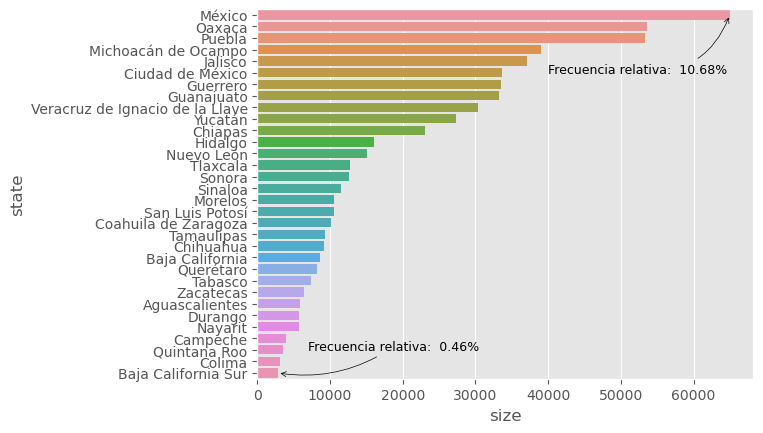

In [9]:
state_more_records = groupedvalues.loc[16, 'relative frequency']
state_lest_records = groupedvalues.loc[2, 'relative frequency']
sns.barplot(x=groupedvalues['size'], y=groupedvalues['state'])
note_1 = graphAnnotate(64989, 0, 40000, 5, f'Frecuencia relativa: {state_more_records: .2f}%', '.4')
note_2 = graphAnnotate(2791, 31, 7000, 29, f'Frecuencia relativa: {state_lest_records: .2f}%', '-.2')



como se puede observar de la tabla y complementado con la gráfica podemos decir con certeza que el estado con un mayor número de registros es **México** y el estado con menor es **Baja California Sur**

### Pregunta 2

In [10]:
df['personal_ocu'] = df['per_ocu'].apply(lambda x: x[:-9])

In [11]:
df['code_per_ocu'] = df['personal_ocu'].apply(lambda x: '1' if x == '0 a 5' else (
    '2' if x == '6 a 10' else ('3' if x == '11 a 30' else (
        '4' if x == '31 a 50' else ('5' if x == '51 a 100' else (
            '6' if x == '101 a 250' else '7'))
    ))
))

In [12]:
df_sorted = df['code_per_ocu'].sort_values()

In [13]:
dict_code_personal = df.groupby(['code_per_ocu', 'per_ocu'], as_index=False).size().drop(columns='size')
dict_code_personal

,code_per_ocu,per_ocu
0,1,0 a 5 personas
1,2,6 a 10 personas
2,3,11 a 30 personas
3,4,31 a 50 personas
4,5,51 a 100 personas
5,6,101 a 250 personas
6,7,251 y más personas


La tabla anterior muestra el código y el significado que ese código representa.

Esta tabla nos permitira ver con mayor claridad la distribución de personal ocupado por las empresas en los siguientes histogramas

<AxesSubplot:xlabel='code_per_ocu', ylabel='Count'>

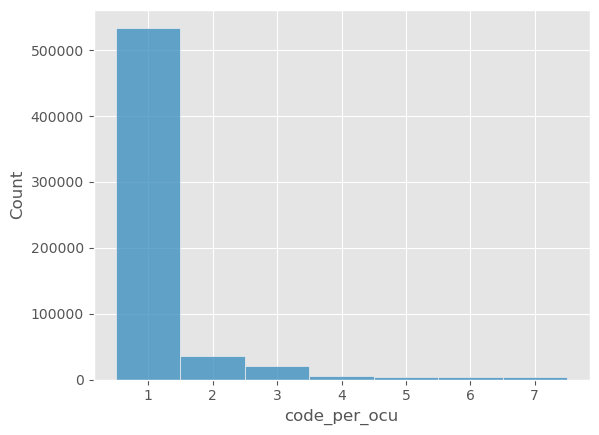

In [14]:
sns.histplot(df_sorted)

Como podemos observar existe un gran sesgo hacia la izquierda concentrandoce los datos mayormente en el código 1 seguido por el 2 y 3.

El cógigo 1 al contar con el mayor número de registro no permite visualizar correctamente la dimesión de los demás rangos por lo cual lo eliminaremos momentaneamente para tener un mejor panorama de los otros códigos.



<AxesSubplot:xlabel='code_per_ocu', ylabel='Count'>

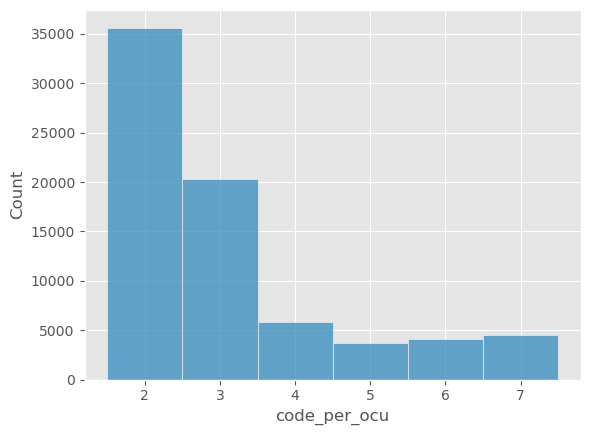

In [15]:
sns.histplot(df_sorted[df_sorted.values != '1'])

Al eliminar la mayor concentración de datos podemos observar con mayor exactitud la dimensión de los rangos restantes y ahora podemos decir con certeza que sigue existiendo un sesgo hacia la izquierda.

por lo cual podemos inferir que nuestra distribución de personal ocupado por las empresas se encuentra mayormente en el rango de **0 a 5 personas**, seguido por los rangos de **6 a 10 personas** y **11 a 30 personas**.

### Pregunta 3

In [16]:
df['registration year'] = df['fecha_alta'].apply(lambda x: x[:4])

In [17]:
time_series = df.groupby(['registration year'], as_index=False).size()

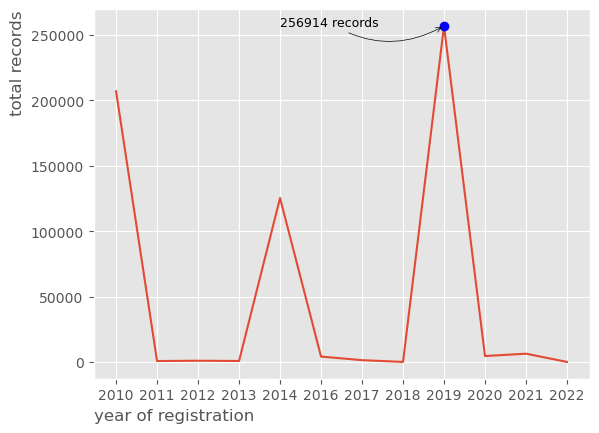

In [18]:
x = time_series['registration year']
y = time_series['size']
graph_time = plt.plot(x, y)
px = '2019'
py = time_series.max()[1]
punto = plt.plot([px], [py], 'bo')

note = graphAnnotate(px, py, '2014', py, f'{py} records', '.3')

plt.xlabel('year of registration', loc='left')
plt.ylabel('total records', loc='top')
plt.show()

El año con el mayor número de registros fue el **2019** con un total de **256914** industrias manufactureras registradas ante el INEGI.

### Pregunta 4

In [19]:
msk_north = ["Baja California", "Baja California Sur", "Sonora", "Chihuahua" , "Coahuila de Zaragoza", "Nuevo León", "Tamaulipas"]
msk_south = ["Campeche", "Chiapas", "Guerrero", "Oaxaca", "Puebla", "Quintana Roo", "Tabasco", "Veracruz de Ignacio de la Llave", "Yucatán"]
df['region'] = df['entidad'].apply(lambda x: "norte" if x in msk_north else ("sur" if x in msk_south else "centro"))

In [20]:
def colorCss(n):
    s='''aliceblue, antiquewhite, aqua, aquamarine, azure, beige, bisque, black, blanchedalmond, blue, 
    blueviolet, brown, burlywood, cadetblue, chartreuse, chocolate, coral, cornflowerblue, 
    cornsilk, crimson, cyan, darkblue, darkcyan, darkgoldenrod, darkgray, darkgrey, darkgreen, 
    darkkhaki, darkmagenta, darkolivegreen, darkorange, darkorchid, darkred, darksalmon, darkseagreen, 
    darkslateblue, darkslategray, darkslategrey, darkturquoise, darkviolet, deeppink, deepskyblue, 
    dimgray, dimgrey, dodgerblue, firebrick, floralwhite, forestgreen, fuchsia, gainsboro, 
    ghostwhite, gold, goldenrod, gray, grey, green, greenyellow, honeydew, hotpink, indianred, indigo, 
    ivory, khaki, lavender, lavenderblush, lawngreen, lemonchiffon, lightblue, lightcoral, lightcyan, 
    lightgoldenrodyellow, lightgray, lightgreen, lightpink, lightsalmon, lightseagreen, 
    lightskyblue, lightslategray, lightsteelblue, lightyellow, lime, limegreen, 
    linen, magenta, maroon, mediumaquamarine, mediumblue, mediumorchid, mediumpurple, 
    mediumseagreen, mediumslateblue, mediumspringgreen, mediumturquoise, mediumvioletred, midnightblue, 
    mintcream, mistyrose, moccasin, navajowhite, navy, oldlace, olive, olivedrab, orange, orangered, 
    orchid, palegoldenrod, palegreen, paleturquoise, palevioletred, papayawhip, peachpuff, peru, pink, 
    plum, powderblue, purple, red, rosybrown, royalblue, saddlebrown, salmon, sandybrown, 
    seagreen, seashell, sienna, silver, skyblue, slateblue, slategray, springgreen, 
    steelblue, tan, teal, thistle, tomato, turquoise, violet, wheat, yellow, yellowgreen'''
    colors_css = s.split(", ")
    colors_css = [l.replace('\n','') for l in colors_css]
    if 0 <= n <= 140:
        return colors_css[n]

In [21]:
def graphRegionPlotly(dataframe, region):

    states = dataframe[(dataframe['region'] == region)]['entidad'].unique()
    num_plots = len(states)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    activity_name = []
    activity_color = {}
    show_legend = True

    count_row = 1
    count_col = 1

    # Initialize figure with subplots
    fig = make_subplots(
        rows=num_rows, cols=num_cols, 
        subplot_titles=([state for state in states]))
    
    for state in states:
        colors = []
        for index, value in dataframe[dataframe['entidad'] == state].loc[:,["codigo_act", 'nombre_act']].value_counts()[:3].items():
            if index[1] not in activity_color.keys():
                activity_color[index[1]] = colorCss(random.randint(0, 140))
            colors.append(activity_color[index[1]])

            if index[0] not in activity_name:
                activity_name.append(index[0])
                show_legend = True
            else:
                show_legend = False

            fig.add_trace(go.Bar(x=[str(index[0])], y=[value],
                                legendgroup=index[1],
                                legendgrouptitle_text=index[1],
                                hovertext=index[1],
                                marker_color=colors[-1],
                                name=str(index[0]),
                                showlegend=show_legend,
                                hovertemplate='<i>Total</i>: %{y}'),
                            row=count_row, col=count_col)

            fig.update_xaxes(title_text="Activity Code", row=count_row, col=count_col, titlefont=dict(size=13))
            fig.update_yaxes(title_text="Total Industries", row=count_row, col=1, titlefont=dict(size=13))
        if count_col == num_cols:
            count_col = 0
            count_row += 1

        count_col += 1

    # Update title and height
    fig.update_layout(title_text="Región " + region, height=700, legend_title_text='Activity Name',
                        legend=dict(title_font_family="Courier New, monospace",
                        font=dict(family="Courier", size=12, color="black"),
                        bgcolor="whitesmoke", bordercolor="Black", borderwidth=1,
                        grouptitlefont=dict(family="Courier New, monospace", size=12, color="black")))
    return fig

In [22]:
graphRegionPlotly(df, "norte")

In [23]:
def regionFilter(region):
    filtered_data = df[df['region'] == region]
    filtered_df = filtered_data.groupby(['nombre_act'], as_index=False).size().rename(
        columns={'nombre_act':'activity_name', 'size':'total_registers'}).sort_values('total_registers', ascending=False)[:5]
    absolute_frequency = len(filtered_data)
    filtered_df['relative frequency'] = filtered_df['total_registers'].apply(lambda x: x / absolute_frequency * 100)

    return filtered_df

In [24]:
northern_region = regionFilter('norte')
northern_region

,activity_name,total_registers,relative frequency
219,Fabricación de productos de herrería,7909,11.668634
64,Elaboración de tortillas de harina de trigo de...,6594,9.728533
65,Elaboración de tortillas de maíz y molienda de...,6522,9.622307
274,Panificación tradicional,5557,8.198584
258,Impresión de formas continuas y otros impresos,3479,5.132783


En el gráfico se puede observar que el código y color que más se repite en los estados pertenece a la actividad de **Fabricación de productos de herrería**, ya que se encuentra en los 7 estados que conforman a la región norte y al compararlo con la tabla que presenta el top 5 de nombres de actividades con mayores registros en la región, así como su frecuencia relativa podemos encontrar que la **Fabricación de productos de herrería** se encuentra en el top 1 con el mayor número de registros.

Por lo que podemos afirmar que en la región norte existe una predominancia de **Fabricación de productos de herrería**.

In [35]:
graphRegionPlotly(df, "centro")

El gráfico anterior nos muestra que el código **311830** se encuentra en todos los estados de la región centro, seguido por el **311812** que se encuentra en 11 de los 12 estados, con eso podriamos inferir que las actividades que corresponden a esos códigos son las que predominan en la región centro.

Pero al revisar la siguiente tabla, notamos que la frecuencia relativa del código **311830** se encuentra aproximadamente 8.2% arriba que la del **311812**, lo cual nos dice que la actividad predominante en la región centro le pertecene a la **Elaboración de tortillas de maíz y molienda de nixtamal**.

In [26]:
central_region = regionFilter('centro')
central_region

,activity_name,total_registers,relative frequency
67,Elaboración de tortillas de maíz y molienda de...,56280,18.484094
279,Panificación tradicional,31174,10.238507
224,Fabricación de productos de herrería,30722,10.090056
285,Purificación y embotellado de agua,14303,4.697548
184,"Fabricación de muebles, excepto cocinas integr...",14092,4.628249


In [32]:
graphRegionPlotly(df, "sur")

In [28]:
southern_region = regionFilter('sur')
southern_region


,activity_name,total_registers,relative frequency
65,Elaboración de tortillas de maíz y molienda de...,47329,20.054831
268,Panificación tradicional,23152,9.810253
19,"Confección, bordado y deshilado de productos t...",20483,8.679311
215,Fabricación de productos de herrería,18840,7.983119
271,Preparación e hilado de fibras duras naturales,15509,6.571666


En la región sur a diferencia de las otras dos regiones, en su gráfica se puede observar una clara actividad dominante, ya que se encuentra en los 9 estados que la conforman, y además sólo una actividad más alcanza a llegar a 6 de 9 estados.

Así como analizando la tabla descubrimos que tiene una frecuencia relativa 10.2% mayor que la del top 2, por lo cual en la región norte la actividad que predomina es: **Elaboración de tortillas de maíz y molienda de nixtamal** y asu vez coincide con la actividad de la región centro.

In [29]:
if not os.path.exists('data'):
        os.mkdir('data')
        cols_to_use = ['codigo_act', 'nombre_act', 'cve_ent', 'entidad', 'region', 'registration year']
        df.to_csv('data/denue_inegi.csv', encoding='UTF-8', index=False, columns=cols_to_use)
        shutil.rmtree('dataset-zip/conjunto_de_datos')
        shutil.rmtree('dataset-zip/diccionario_de_datos')
        shutil.rmtree('dataset-zip/metadatos')
        os.remove('dataset-zip/denue_inegi.csv')

Creamos el dataset que sera utilizado por la aplicación del dashboard